In [37]:
#Importing packages
import requests
import pandas as pd

In [38]:
#DMI requires a key to access their API
api_key = '12a4bffe-21d5-4154-96e5-12bf959cc1dd'

In [39]:
#Request API - observation
url = 'https://dmigw.govcloud.dk/metObs/v1/observation'
r = requests.get(url ,params={'api-key': api_key})
print(r, r.url)

<Response [200]> https://dmigw.govcloud.dk/metObs/v1/observation?api-key=12a4bffe-21d5-4154-96e5-12bf959cc1dd


In [40]:
#function that gets the relevant data for the chosen period
end_time = pd.datetime.today()
start_time = pd.datetime(2018,1,1)

def datetime_to_unixtime(dt):
    '''Function converting a datetime objects to a Unix microsecond string'''
    return str(int(pd.to_datetime(dt).value*10**-3))

#Specify query parameters
params = {'api-key' : api_key,
          'from' : datetime_to_unixtime(start_time),
          'to' : datetime_to_unixtime(end_time),
          'stationId' : '06184',
          'parameterId' : 'temp_dry',
          'limit' : '1000000',
          }


r = requests.get(url, params=params) # submit GET request based on url and headers
print(r, r.url) # Print request status and url

<Response [200]> https://dmigw.govcloud.dk/metObs/v1/observation?api-key=12a4bffe-21d5-4154-96e5-12bf959cc1dd&from=1514764800000000&to=1598146329835339&stationId=06184&parameterId=temp_dry&limit=1000000


In [41]:
json = r.json() # Extract JSON object
df = pd.DataFrame(json) # Convert JSON object to a DataFrame

df['time'] = pd.to_datetime(df['timeObserved'], unit='us') # Set the DataFrame index as the observation time

df = df.drop(['_id', 'timeCreated', 'timeObserved'], axis=1) # Delete unused columns

df.index = df['time'] # Set the time as the index
#udvælger temp_dry: Present air temperature measured 2 m over terrain every 10 min
#vejr=df.loc[(df['parameterId'] == 'temp_dry')].copy()
#vejr
#"df2 = df.loc[(df['parameterId']=='temp_dry')].copy() # Set the time as the index

print(df.head()) # Print the first five rows

parameterId stationId  value                time
time                                                                
2020-08-22 23:30:00    temp_dry     06184   17.3 2020-08-22 23:30:00
2020-08-22 23:20:00    temp_dry     06184   17.5 2020-08-22 23:20:00
2020-08-22 23:10:00    temp_dry     06184   17.6 2020-08-22 23:10:00
2020-08-22 23:00:00    temp_dry     06184   17.7 2020-08-22 23:00:00
2020-08-22 22:50:00    temp_dry     06184   17.6 2020-08-22 22:50:00


In [42]:
import numpy as np
df['time2']=df.time.astype(str).str[:10].copy()
df

,parameterId,stationId,value,time,time2
time,,,,,
2020-08-22 23:30:00,temp_dry,06184,17.3,2020-08-22 23:30:00,2020-08-22
2020-08-22 23:20:00,temp_dry,06184,17.5,2020-08-22 23:20:00,2020-08-22
2020-08-22 23:10:00,temp_dry,06184,17.6,2020-08-22 23:10:00,2020-08-22
2020-08-22 23:00:00,temp_dry,06184,17.7,2020-08-22 23:00:00,2020-08-22
2020-08-22 22:50:00,temp_dry,06184,17.6,2020-08-22 22:50:00,2020-08-22
...,...,...,...,...,...
2018-01-01 00:40:00,temp_dry,06184,7.6,2018-01-01 00:40:00,2018-01-01
2018-01-01 00:30:00,temp_dry,06184,7.6,2018-01-01 00:30:00,2018-01-01
2018-01-01 00:20:00,temp_dry,06184,7.6,2018-01-01 00:20:00,2018-01-01


In [43]:
#Dayly average
A= np.mean(df.value.loc[df['time2']=='2020-08-22'])
B= np.mean(df.value.loc[df['time2']=='2020-08-21'])
C= np.mean(df.value.loc[df['time2']=='2020-08-01'])
D= np.mean(df.value.loc[df['time2']=='2018-01-21'])

print(A)
print(B)
print(C)
print(D)

21.11338028169014
20.572916666666668
18.523611111111105
0.7652777777777777


In [51]:
test=df.value.loc[df['time2']=='2020-08-22']
test
test2=df.value.loc[df['time2']=='2018-10-10']
test2

time
2020-08-22 23:30:00    17.3
2020-08-22 23:20:00    17.5
2020-08-22 23:10:00    17.6
2020-08-22 23:00:00    17.7
2020-08-22 22:50:00    17.6
                       ... 
2020-08-22 00:40:00    20.2
2020-08-22 00:30:00    20.2
2020-08-22 00:20:00    20.2
2020-08-22 00:10:00    20.3
2020-08-22 00:00:00    20.3
Name: value, Length: 142, dtype: float64

Text(0.5, 0, '')

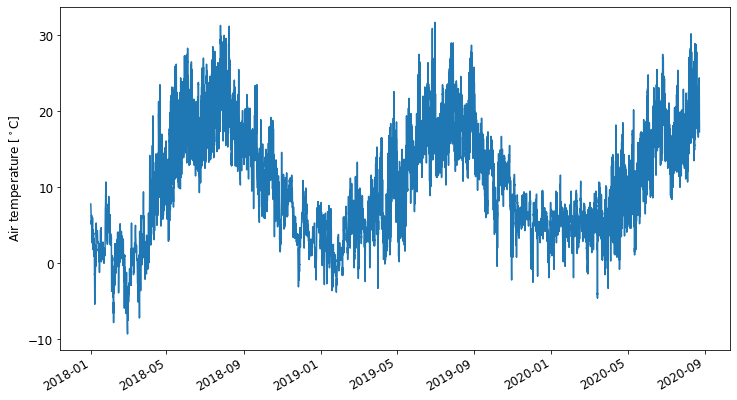

In [45]:
df2 = df.set_index(['time', 'parameterId']).drop_duplicates().unstack(level=-1)['value']

params = ['temp_dry'] # Chosing which parameters to plot

# Generate plot of data
ax = df2[params].interpolate().plot(figsize=(12,7), legend=False, fontsize=12, subplots=True)
#ax[0].set_ylabel('Wind speed [m/s]', size=12)
#ax[1].set_ylabel('Humidity [%]', size=12)
ax[0].set_ylabel('Air temperature [$^\circ$C]', size=12)
ax[0].set_xlabel('', size=12)

Henter data fra 1/1-2018 - nu
For DMI aka KBH - stationId: 06184

TO DO:
dayly average loop
